# TUGAS
Mendeteksi orientasi teks dan jenis skrip

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

**Tugas:**

**1. Persiapan Gambar:**

- Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
- Tampilkan gambar asli menggunakan Python dan OpenCV.

**2. Deteksi Orientasi dan Skrip:**
- Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
- Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
- Tampilkan hasil orientasi dan jenis skrip.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [37]:
IMG_DIR = '/content/drive/MyDrive/Machine_Learning/images-ocr/images'

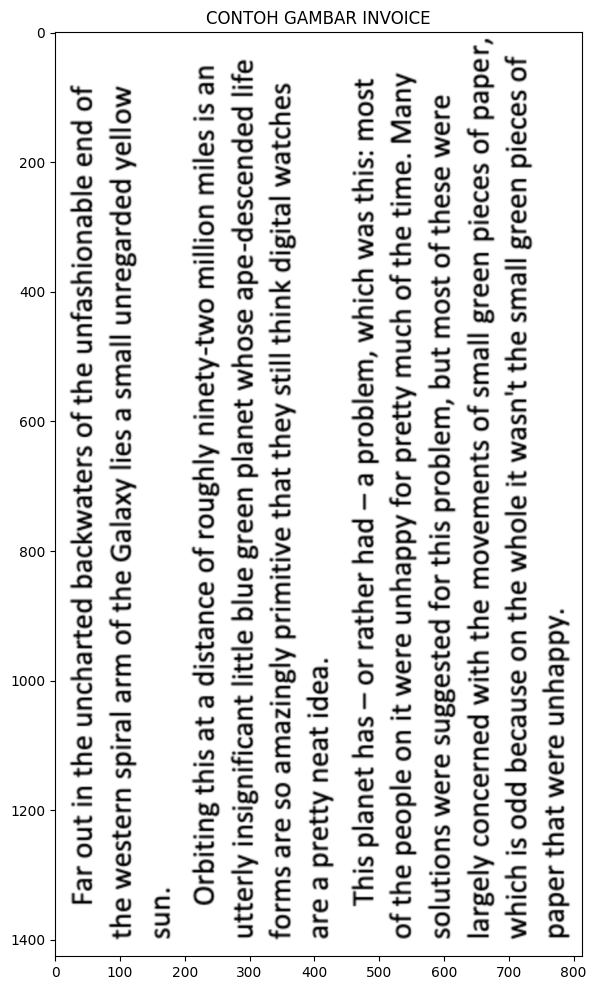

In [38]:
# Membaca gambar dari direktoti
image = cv2.imread(IMG_DIR + '/hitchhikers-rotated.png')

# OpenCV reads images in BGR format, so we need to convert it to RGB for displaying with Matplotlib
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()

In [39]:
# Use pytesseract to get text orientation and script
osd = pytesseract.image_to_osd(rgb_img)

# Use regular expressions to extract angle and script information
angle_match = re.search('(?<=Rotate: )\d+', osd)
script_match = re.search('(?<=Script: )\w+', osd)

# Check if matches were found
if angle_match:
    angle = angle_match.group(0)
    print("Angle: ", angle)
else:
    print("Angle not found.")

if script_match:
    script = script_match.group(0)
    print("Script: ", script)
else:
    print("Script not found.")

Angle:  90
Script:  Latin


**Menampilkan Teks dalam Gambar yang dirotasi**



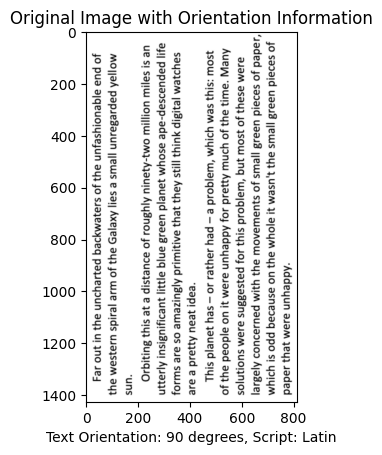

In [40]:
# Display the original image with orientation information
plt.imshow(rgb_img)
plt.title('Original Image with Orientation Information')
plt.xlabel(f"Text Orientation: {angle} degrees, Script: {script}")
plt.show()

**Merotasi gambar -90 derajat**



In [41]:

from PIL import Image
import os

def rotate_image(image_path, degrees):
    """
    Rotate an image and save the result.

    Parameters:
    - image_path (str): Path to the input image.
    - degrees (float): Degrees to rotate the image.

    Returns:
    - rotated_image (PIL.Image.Image): Rotated image.
    """
    # Open the image
    original_image = Image.open(image_path)

    # Rotate the image
    rotated_image = original_image.rotate(degrees, expand=True)

    # Get the base filename (without extension) from the original image path
    base_filename = os.path.splitext(os.path.basename(image_path))[0]

    # Define the path for saving the rotated image
    save_path = os.path.join('/content/drive/MyDrive/Machine_Learning/images-ocr', f'{base_filename}_rotated.png')

    # Save the rotated image
    rotated_image.save(save_path)

    # Return the rotated image
    return rotated_image

# Example usage:
image_path = '/content/drive/MyDrive/Machine_Learning/images-ocr/images/hitchhikers-rotated.png'
rotated_image = rotate_image(image_path, -90)

# Show the rotated image
rotated_image.show()

**Menampilkan teks pada gambar yang telah di rotasi -90**



In [44]:
import pytesseract
from PIL import Image

# Baca gambar yang sudah diputar
rotated_image = Image.open('/content/drive/MyDrive/Machine_Learning/images-ocr/hitchhikers-rotated_rotated.png')

# Ekstraksi teks menggunakan Tesseract OCR
text = pytesseract.image_to_string(rotated_image)

# Tampilkan teks hasil ekstraksi
print(text)

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

